In [98]:
#importing needed packages
#analying regression data using linear regression, decision trees, random forest and xgboost

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import torch
import torch.nn as nn
from torcheval.metrics import R2Score

In [3]:
df = pd.read_csv(r"C:\kannan\guvi\datasets\housing_prediction\Housing.csv")

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
feature_columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [8]:
X = df[feature_columns]
y = df['price']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
model = linear_model.LinearRegression()
print(model)

LinearRegression()


In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print(model.coef_)
model.intercept_

[-3.20270564e+04  3.60430220e+04  1.06391079e+02  1.32292792e-01
  1.01377972e+04  5.38859937e+05  5.19962783e+04  2.76646099e+04
  9.55637750e+04  6.86610773e+01  3.77300022e+01 -2.51780372e+03
  2.10774833e+01 -5.49749599e+02  6.10250308e+05 -2.06300299e+05
  2.11954293e+01 -3.47649140e-01]


3961189.5090781646

In [20]:
y_pred = model.predict(x_test)

In [25]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#68%

54219223903.21422
129451.55070154567
0.25300961846079395
0.6858695315117553


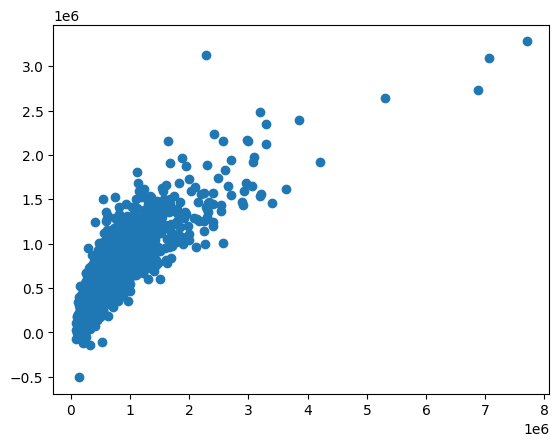

In [27]:
plt.scatter(y_test,y_pred)

In [34]:
#Decision Tree regressor - basic parameters yet to do hyper parameter tuning
model_dt = DecisionTreeRegressor()
model_dt = model_dt.fit(x_train,y_train)

In [36]:
y_pred = model_dt.predict(x_test)

36257379556.1215
100162.34894749017
0.1842490024124653
0.7899352516286136


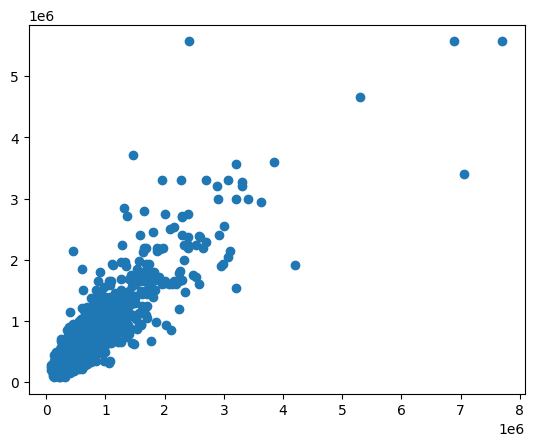

In [38]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#78%
plt.scatter(y_test,y_pred)

In [41]:
#Random forest regressor - basic parameters yet to do hyper parameter tuning
model_rf = RandomForestRegressor()
model_rf = model_rf.fit(x_train, y_train)

In [42]:
y_pred = model_rf.predict(x_test)

23309432913.817852
72568.70080227943
0.13077135658702402
0.8649519016634459


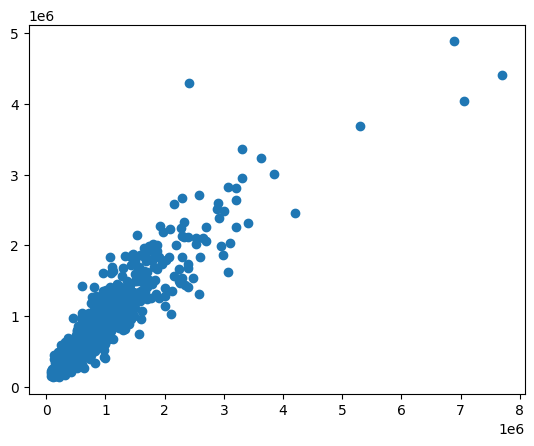

In [43]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#86%
plt.scatter(y_test,y_pred)

In [45]:
model_xgb = xgb.XGBRegressor()
model_xgb = model_xgb.fit(x_train, y_train)

In [46]:
y_pred = model_xgb.predict(x_test)

22994817756.210865
70344.53064458998
0.12677113346587782
0.8667746906991025


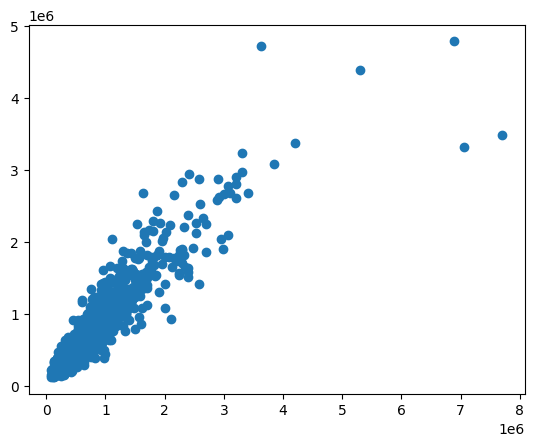

In [47]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#86.67%
plt.scatter(y_test,y_pred)

In [51]:
#XGBoost Regressor using Grid Search cv

param1 = {
    'nthread':[4],
    'objective':['reg:linear'],
    'learning_rate':[0.02,0.04,0.05,0.07],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'subsample':[0.7],
    'colsample_bytree':[0.7],
    'n_estimators':[500],
}

gs = GridSearchCV(estimator = xgb.XGBRegressor(),
    param_grid=param1,
    cv=5,
    n_jobs=5,
    verbose=True)

gs.fit(x_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\kannan\code\playground\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:25:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.02, 0.04, 0.05, 0.07],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'subsample': [0.7]},
             verbose=True)

In [60]:
gs.best_score_

0.8983042658028838

In [53]:
gs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [56]:
best_model_xgb = gs.best_estimator_

y_pred = best_model_xgb.predict(x_test)

20760810729.206394
66732.8647785103
0.12206394162911638
0.8797178799127966


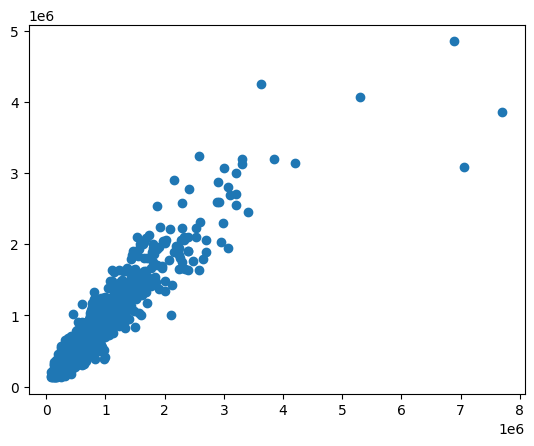

In [61]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#87.79%
plt.scatter(y_test,y_pred)

In [65]:
gs.best_index_

39

In [84]:
torch_tensor_csv_x.size()

torch.Size([17290, 18])

In [164]:
#trying same in ANN

#get column headers
col_headers_x = list(x_train.columns.values)

#convert to torch tensors
torch_tensor_csv_x = torch.tensor(x_train[col_headers_x].values).float()
#y_train

#col_headers_y = list(y_train.columns.values)

#convert to torch tensors
torch_tensor_csv_y = torch.tensor(y_train.values).float()

In [165]:
data_x = torch_tensor_csv_x.clone()
data_y = torch_tensor_csv_y.clone()

In [166]:
data_y = torch.div(data_y,10000000)
#data_y

In [168]:
data_y

tensor([0.0353, 0.0301, 0.0435,  ..., 0.0650, 0.0437, 0.1025])

In [167]:
print(data_x.size())
print(data_y.size())

torch.Size([17290, 18])
torch.Size([17290])


In [169]:
#same data in ANN - deep learning model

n_input = 18 # 7 inputs which is featues
n_hidden_1 = 10 # 5 hidden nodes and check for 6 -- if we have more hidden nodes then it might endup over fitting
n_hidden_2 = 6
n_out = 1 # 1 output and they all are fully connected
batch_size = 17290 # 100 samples - data size
learning_rate = 0.01 # new rate = old rate * learning rate - old rate

#we formatted the data_x and data_y in previous cells

print(data_x.size())
print(data_y.size())

#setting a model - this is called making an architecture 
#-- Relu Activation function for those 5 vectors
#-- nn.sigmoid another activation function to keep data between 0 and 1
model = nn.Sequential(nn.Linear(n_input, n_hidden_1), nn.Sigmoid(), nn.Linear(n_hidden_1, n_hidden_2),  nn.ReLU(), nn.Linear(n_hidden_2, n_out), nn.Sigmoid())
print(model)

#loss function
loss_function = nn.MSELoss()

#define optimizer -- Stochastic Gradient Descent for optimisation
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

torch.Size([17290, 18])
torch.Size([17290])
Sequential(
  (0): Linear(in_features=18, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=1, bias=True)
  (5): Sigmoid()
)


In [170]:
losses = []
for epoch in range(20):
    #forward pass
    pred_y = model(data_x)
    #calculate loss
    loss = loss_function(pred_y, data_y)
    #append to list of losses
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    

c:\kannan\code\playground\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17290])) that is different to the input size (torch.Size([17290, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


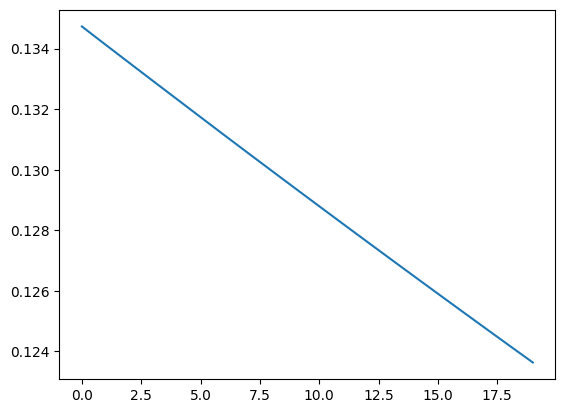

In [171]:
plt.plot(losses)

In [177]:
col_headers_x = list(x_test.columns.values)

#convert to torch tensors
torch_tensor_csv_x_test = torch.tensor(x_test[col_headers_x].values).float()
#y_train

#col_headers_y = list(y_train.columns.values)

#convert to torch tensors
torch_tensor_csv_y_test = torch.tensor(y_test.values).float()

In [180]:
torch_tensor_csv_y_test

tensor([0.0459, 0.0445, 0.1057,  ..., 0.0260, 0.1795, 0.0418])

In [179]:
torch_tensor_csv_y_test = torch.div(torch_tensor_csv_y_test,10000000)

In [181]:
y_pred = model(torch_tensor_csv_x_test)

In [182]:
y_pred

tensor([[0.4029],
        [0.4029],
        [0.4060],
        ...,
        [0.4029],
        [0.4029],
        [0.4029]], grad_fn=<SigmoidBackward0>)

In [99]:
metric = R2Score()

In [183]:
print(torch_tensor_csv_y_test.size())
print(y_pred.size())

torch.Size([4323])
torch.Size([4323, 1])


In [184]:
y_test_1 = torch_tensor_csv_y_test.unsqueeze(1)

In [185]:
print(y_test_1.size())
print(y_pred.size())

torch.Size([4323, 1])
torch.Size([4323, 1])


In [188]:
py_test = pd.DataFrame(y_test_1)

In [191]:
py_pred = pd.DataFrame(y_pred[0])

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [189]:
py_test

,0
0,0.045900
1,0.044500
2,0.105700
3,0.073235
4,0.023500
...,...
4318,0.096500
4319,0.035995
4320,0.026000
4321,0.179500


In [150]:
y_pred = torch.div(y_pred,10000000)

In [157]:
y_test_1 = torch.div(y_test_1,10000000)

In [160]:
metric.update(y_test_1, y_pred)

In [161]:
#y_pred
metric.compute()

tensor(-5.5040e+11)

In [163]:
y_pred

tensor([[5.1600e-08],
        [5.1600e-08],
        [5.4483e-08],
        ...,
        [5.1600e-08],
        [5.1600e-08],
        [5.1600e-08]], grad_fn=<DivBackward0>)